# Task 1 - Statistical analysis 

## 1. Introduction 

In this part of the task, a statistical analysis we will be performed to compare the performance of the heuristic algorithm against Dijkstra.  

In doing so, it will also characterize: 
- the **length of** the **shortest path** 
- the **elapsed time** of the algorithms

In dependence of the grid's size for Heuristic and Dijsktra's algorithms. 

## 2. Analysis

The analysis is divided into two parts:

1. **Heuristic vs Dijkstra**: this part includes a brief description of how the heuristic algorithm works. Then, an performance evaluation will be performed of both algorithms in a small grid of size 4x4 for visualization purposes. Finally, the issues found with the heuristic algorithm will be presented, specifying how Dijkstra solves them.


2. **Algorithmic Performance**: this part includes a performance evaluation of the Heuristic and Dijkstra algorithms' when incrementing the grid's size.


### 2.1 Heuristic vs Dijkstra 

#### 2.1.1 Algorithm descriptions 

**The Heuristic Algorithm** 

At the start of the algorithm, the following objects are initialized: 

- the variable `timestep`: to store the cumulative timesteps the agent spends on each of the cells on the shortest path.


- the list `shortest_path`: to keep track of the cells in the shortest path. 


The algorithm's steps are: 

1. The agent starts in the grid's upper-left corner, corresponding to the grid's first cell. It stores the cell's number in `timestep`. 


2. It moves onto the adjacent cells (i.e., the one to the right and directly below). It evaluates each one and moves into the cell with fewer timesteps, adding the cell's number to `timestep` and storing the cell's name in `shortest_path.` 


3. It repeats this process until it reaches the grid's lower-right corner corresponding to the last cell, adding its number to `timestep` and name to `shortest_path.` 



Let us view this with an example. 

In [84]:
# First, we import useful modules and packages. 
from IPython.display import display
from Implementation import Grid
import pandas as pd 
from Strategies import Shortest_Path
import random
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import numpy as np

In [85]:
def print_grid(grid): 
    df = pd.DataFrame(data=grid, index=None)
    print(df)
    
    
def plot_grid(grid):

    fig, ax = plt.subplots()

    ax.matshow(grid, cmap=ListedColormap('w'))

    for (i, j), z in np.ndenumerate(grid):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    plt.axis('off')
    plt.show()
    
def evaluate(x, y, x_label, y_label):
    import seaborn as sns
    import numpy as np
    import pandas as pd
    
    x = np.asarray(x)
    y = np.asarray(y)
    df = pd.DataFrame()
    df[x_label] = x
    df[y_label] = y
    labels = df.columns
    
    sns.set_theme()
    sns.relplot(
        data=df, kind="line",
        x=labels[0], y=labels[1],
    )

In [86]:
#We create an instant of the class Shortest_Path, including the heuristic_algorithm and dijkstra_algorithm methods.
game = Shortest_Path(4, 4)

#generate random grid
random_seed = 3 
grid = game.generate_random_grid(random_seed)

print_grid(grid)
#plot_grid(grid)

     0    1    2    3
0  8.0  3.0  8.0  8.0
1  0.0  5.0  3.0  5.0
2  7.0  6.0  0.0  4.0
3  7.0  8.0  1.0  6.0


In [87]:
#we use the the heuristic_algorithm method

shortest_path, timestep = game.heuristic_algorithm(grid)

print('Shortest path: ')
print(shortest_path)
print('')
print('Heuristic Timesteps: ')
print(timestep)

Shortest path: 
['node_00', 'node_10', 'node_11', 'node_12', 'node_22', 'node_32', 'node_33']

Heuristic Timesteps: 
23.0


Let us compare this result with the Dijkstra algorithm.

In [88]:
#we use the dijkstra_algorithm method

shortest_path, timestep, previous_nodes, shortest_path_grid = game.dijkstra_algorithm(grid)

print('Shortest path: ')
print(shortest_path)
print('')
print('Dijkstra Timesteps: ')
print(timestep)


Shortest path: 
{'node_00': 8.0, 'node_01': 11.0, 'node_02': 19.0, 'node_03': 27.0, 'node_10': 8.0, 'node_11': 13.0, 'node_12': 16.0, 'node_13': 21.0, 'node_20': 15.0, 'node_21': 19.0, 'node_22': 16.0, 'node_23': 20.0, 'node_30': 22.0, 'node_31': 27.0, 'node_32': 17.0, 'node_33': 23.0}

Dijkstra Timesteps: 
23.0


The results show that both algorithms coincide in the number of timesteps. 

Nevertheless, it is important to emphasize the difference in how `shortest_path` is presented in both algorithms. 

- In the heuristic algorithm,`shortest_path` is presented as a list containing the sequence of cells visited by the agent. 

- In the Dijkstra algorithm, `shortest_path` is a dictionary. It includes all the cells with their tentative distance to their neighbor with fewer timesteps. The Dijkstra algorithm visits all the nodes before it stops.    

    *Note: the* tentative distance *of a given cell is the length of the shortest path discovered so far between that cell and the starting node.*
 

Let us visualize it to see it more clearly:

In [89]:
print("Grid:")
print('')
print_grid(grid)
print('')
print("Tentative distances: ")
print('')
print_grid(shortest_path_grid)
print('')

print("Shortest_Path:")
print('')
print("Start at node_00," + f" from {previous_nodes['node_01']} move to node_01," 
      + f" from {previous_nodes['node_11']} move to node_11, etc.")


Grid:

     0    1    2    3
0  8.0  3.0  8.0  8.0
1  0.0  5.0  3.0  5.0
2  7.0  6.0  0.0  4.0
3  7.0  8.0  1.0  6.0

Tentative distances: 

      0     1     2     3
0   8.0  11.0  19.0  27.0
1   8.0  13.0  16.0  21.0
2  15.0  19.0  16.0  20.0
3  22.0  27.0  17.0  23.0

Shortest_Path:

Start at node_00, from node_00 move to node_01, from node_10 move to node_11, etc.


#### 2.1.2. Issues with the heuristic algorithm

At first glance, both algorithms perform their tasks well. However, upon further analysis, it was discovered that the heuristic algorithm presents specific issues. Let us have a look at what these are. 

In [90]:
game = Shortest_Path(4, 4)

#generate random grid
random_seed = 5 
grid = game.generate_random_grid(random_seed)

print_grid(grid)
#plot_grid(grid)

     0    1    2    3
0  3.0  6.0  6.0  0.0
1  8.0  4.0  7.0  0.0
2  0.0  7.0  1.0  5.0
3  7.0  0.0  1.0  4.0


In [91]:
#heuristic_algorithm method
shortest_path, timestep = game.heuristic_algorithm(grid)
print('Heuristic Timesteps: ')
print(timestep)

print('')

#dijkstra_algorithm method
shortest_path, timestep, previous_nodes, shortest_path_grid = game.dijkstra_algorithm(grid)
print('Dijkstra Timesteps: ')
print(timestep)

Heuristic Timesteps: 
29.0

Dijkstra Timesteps: 
23.0


There is a difference in timesteps. This difference is caused by the way the algorithms were designed. Dijkstra algorithm finds the shortest path between the starting node and every other, which can then be used for finding the fastest route to the node in the grid's lower-right corner. By contrast, the heuristic algorithm considers only the shortest distance from the node where the agent is to the two nearest neighbors; it does not take into account the grid's overall distribution. As a result, in cases such as this, the algorithm provides the straightest path instead of the shortest. 

This design fault also leads to issues in finding the shortest path when the agents encounter two neighbors with the same timestep. The agent will tend to favor the second neighbor over the first because of how the algorithm was designed. 

*Note: "first" and "second" refer to the order in which the agent visits its neighbours during the if statements.* 

### 2.2. Dijkstra Algorithm's Performance

In this section, a performance evaluation of the Heuristic and Dijkstra algorithms will be carried out according to the grid's size using the elapsed time and the shortest path length as metrics. 

In [92]:
import time 
random_seed = 12


grid_size = []
heuristic_ts = []
heuristic_dt = []


for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    start_time = time.time()
    shortest_path, timestep = game.heuristic_algorithm(grid)
    end_time = time.time()
    dt = end_time - start_time
    
    grid_size.append(x)
    heuristic_ts.append(timestep) 
    heuristic_dt.append(dt)


In [93]:
import time 
random_seed = 12


grid_size = []
dijkstra_ts = []
dijkstra_dt = []


for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    start_time = time.time()
    shortest_path, timestep, previous_nodes, shortest_path_grid = game.dijkstra_algorithm(grid)
    end_time = time.time()
    dt = end_time - start_time
    
    grid_size.append(x)
    dijkstra_ts.append(timestep) 
    dijkstra_dt.append(dt)


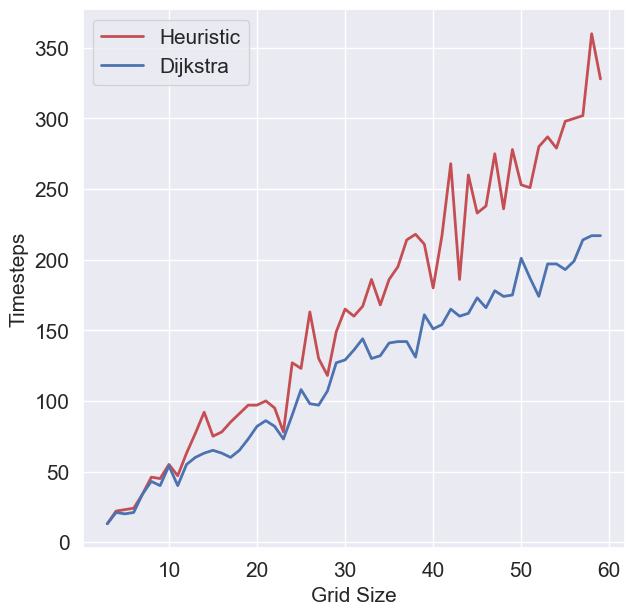

In [94]:
x = np.asarray(grid_size)
y1 = np.asarray(heuristic_ts)
y2 = np.asarray(dijkstra_ts)

fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.plot(x, y1, 'r', linewidth=2.0,  label='Heuristic')
ax.plot(x, y2, 'b',linewidth=2.0, label='Dijkstra')
ax.set_xlabel('Grid Size', fontsize=15)
ax.set_ylabel('Timesteps', fontsize=15)
ax.legend(fontsize=15)
ax.tick_params(labelsize=15)

In this figure, we plotted the shortest path's timesteps against the grid's size for the Heuristic and Dijkstra algorithms, represented by a red and blue line, respectively. The grid's dimensions correspond to KxK, where the independent variable gives K. As expected, we can see that there is a positive correlation between the length of the shortest path and the grid's size for both algorithms since the timesteps increase linearly with K. 

 Overall, the Dijkstra algorithm has fewer timesteps than the heuristic algorithm. If the heuristics algorithms worked correctly, it would render the same number of timesteps. The figures show that the algorithm's results are similar for a lower than 10x10 grid, with exceptions for 7x7 and 8x8. However, we can see that the difference in the number of timesteps is increasingly more prominent as the grid size increases, with the results for the heuristic algorithm being consistently bigger than for Dijkstra's Algorithm. After testing the algorithms with different seeds (3, 5, 6 and 42), we conclude that the heuristic can perform relatively well for dimensions lower than 10x10, after which the algorithm stops working correctly. 

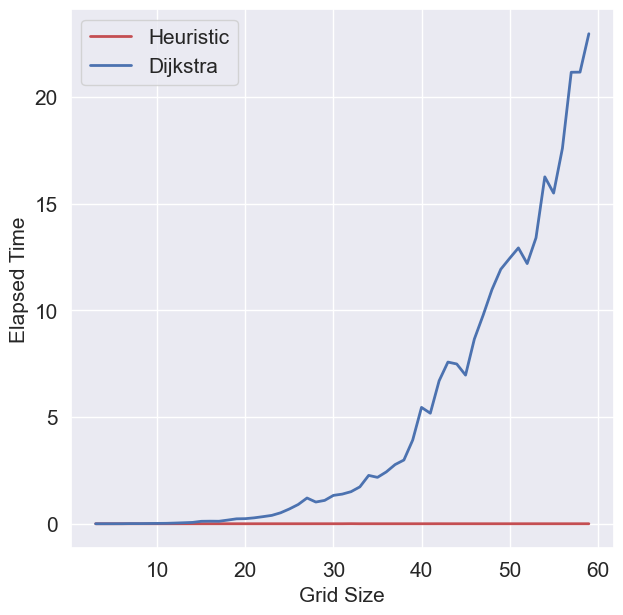

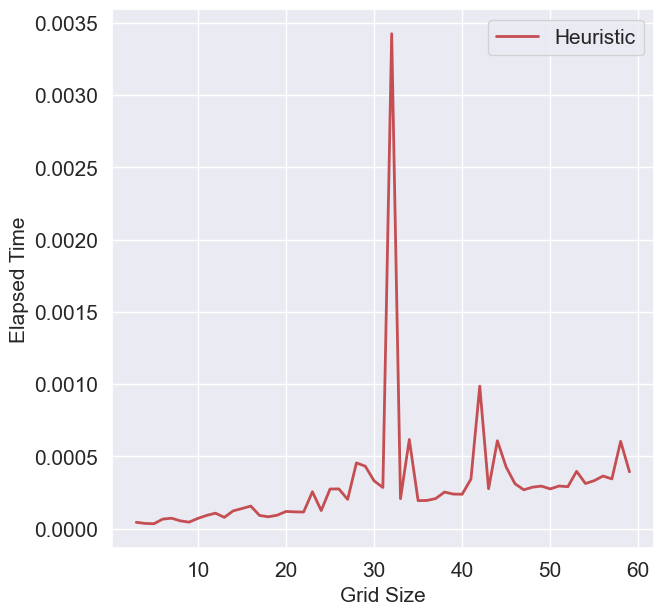

In [95]:
x = np.asarray(grid_size)
y1 = np.asarray(heuristic_dt)
y2 = np.asarray(dijkstra_dt)

fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.plot(x, y1, 'r', linewidth=2.0,  label='Heuristic')
ax.plot(x, y2, 'b',linewidth=2.0, label='Dijkstra')
ax.set_xlabel('Grid Size', fontsize=15)
ax.set_ylabel('Elapsed Time', fontsize=15)
ax.legend(fontsize=15)
ax.tick_params(labelsize=15)

fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.plot(x, y1, 'r', linewidth=2.0,  label='Heuristic')
ax.set_xlabel('Grid Size', fontsize=15)
ax.set_ylabel('Elapsed Time', fontsize=15)
ax.legend(fontsize=15)
ax.tick_params(labelsize=15)

In the first figure, we plotted the elapsed time against the grid's size for the Heuristic and Dijkstra algorithms, represented by a red and blue line, respectively. Once again, the grid's dimensions correspond to KxK, where the independent variable gives K. At first glance, we can see a significant difference between the elapsed time for the two algorithms. The elapsed time for the Dijkstra algorithm increases exponentially as the grid's dimension increases. This behavior makes sense since Dijkstra's Algorithm finds the shortest path between the source node and all other nodes in the grid: the more cells the grid has, the more it will take the algorithm to visit all the nodes. 

It follows that the heuristic algorithm should present similar behavior. However, in the first figure, the elapsed time appears to be constant. In figure 2, we focus the lens on the heuristic algorithm and discover that the elapsed time for the algorithm does increase with the grid's size but does so in a negligible amount. The heuristic algorithm's elapsed time is considerably shorter than Dijkstra's Algorithm. This result is consistent with the previous findings regarding the number of time steps, particularly the difference in results for the two algorithms. A possible explanation for this drastic difference can be linked to the design fault reported earlier. The heuristic algorithm only visits the two nearest neighbors to the node where the agent is; it does not visit all the nodes. Consequently, its computational cost is less dependent on the grid's dimension, and thus it takes less time to execute. 

#### 2.2.1. Testing different seeds

Here we test different seeds to see how the timesteps' behavior changes.   

##### 2.2.1.1. seed = 5

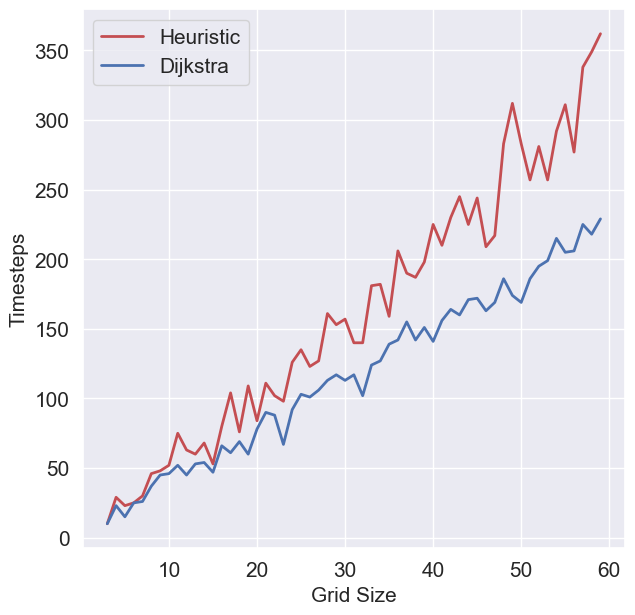

In [96]:
import time 
random_seed = 5

grid_size = []
heuristic_ts = []


for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    shortest_path, timestep = game.heuristic_algorithm(grid)
    grid_size.append(x)
    heuristic_ts.append(timestep) 

#----------------------------

dijkstra_ts = []

for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    shortest_path, timestep, previous_nodes, shortest_path_grid = game.dijkstra_algorithm(grid)
    dijkstra_ts.append(timestep) 
   
    
#----------------------------

x = np.asarray(grid_size)
y1 = np.asarray(heuristic_ts)
y2 = np.asarray(dijkstra_ts)

fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.plot(x, y1, 'r', linewidth=2.0,  label='Heuristic')
ax.plot(x, y2, 'b',linewidth=2.0, label='Dijkstra')
ax.set_xlabel('Grid Size', fontsize=15)
ax.set_ylabel('Timesteps', fontsize=15)
ax.legend(fontsize=15)
ax.tick_params(labelsize=15)

##### 2.2.1.2. seed = 3

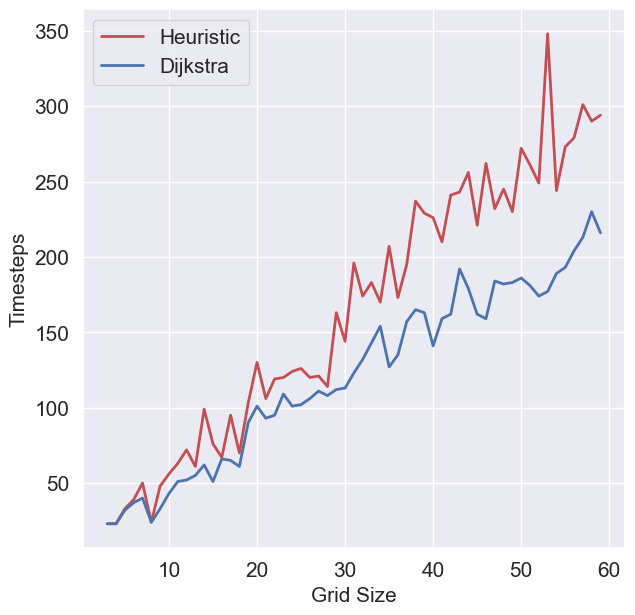

In [97]:
import time 
random_seed = 3

grid_size = []
heuristic_ts = []


for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    shortest_path, timestep = game.heuristic_algorithm(grid)
    grid_size.append(x)
    heuristic_ts.append(timestep) 

#----------------------------

dijkstra_ts = []

for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    shortest_path, timestep, previous_nodes, shortest_path_grid = game.dijkstra_algorithm(grid)
    dijkstra_ts.append(timestep) 
   
    
#----------------------------

x = np.asarray(grid_size)
y1 = np.asarray(heuristic_ts)
y2 = np.asarray(dijkstra_ts)

fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.plot(x, y1, 'r', linewidth=2.0,  label='Heuristic')
ax.plot(x, y2, 'b',linewidth=2.0, label='Dijkstra')
ax.set_xlabel('Grid Size', fontsize=15)
ax.set_ylabel('Timesteps', fontsize=15)
ax.legend(fontsize=15)
ax.tick_params(labelsize=15)

##### 2.2.1.3. seed = 9

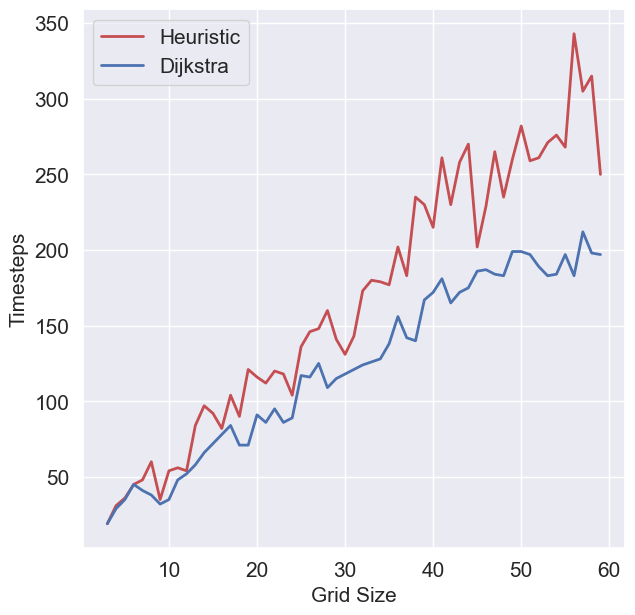

In [98]:
import time 
random_seed = 9

grid_size = []
heuristic_ts = []


for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    shortest_path, timestep = game.heuristic_algorithm(grid)
    grid_size.append(x)
    heuristic_ts.append(timestep) 

#----------------------------

dijkstra_ts = []

for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    shortest_path, timestep, previous_nodes, shortest_path_grid = game.dijkstra_algorithm(grid)
    dijkstra_ts.append(timestep) 
   
    
#----------------------------

x = np.asarray(grid_size)
y1 = np.asarray(heuristic_ts)
y2 = np.asarray(dijkstra_ts)

fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.plot(x, y1, 'r', linewidth=2.0,  label='Heuristic')
ax.plot(x, y2, 'b',linewidth=2.0, label='Dijkstra')
ax.set_xlabel('Grid Size', fontsize=15)
ax.set_ylabel('Timesteps', fontsize=15)
ax.legend(fontsize=15)
ax.tick_params(labelsize=15)

##### 2.2.1.4. seed = 42

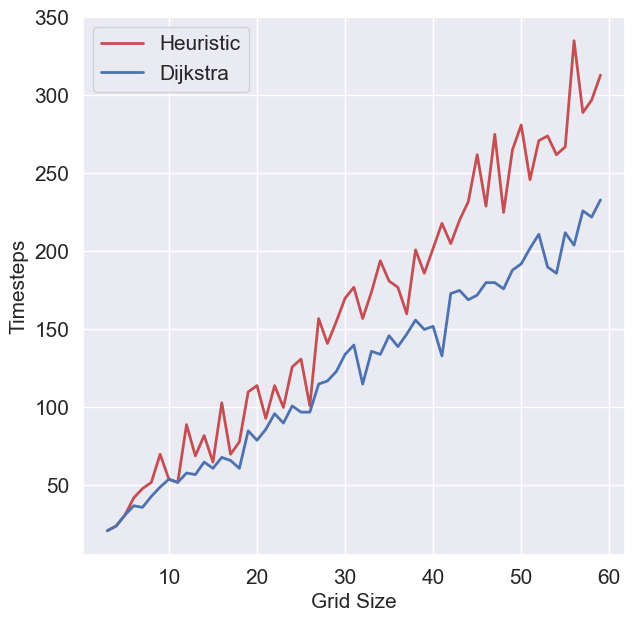

In [99]:
import time 
random_seed = 42

grid_size = []
heuristic_ts = []


for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    shortest_path, timestep = game.heuristic_algorithm(grid)
    grid_size.append(x)
    heuristic_ts.append(timestep) 

#----------------------------

dijkstra_ts = []

for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    shortest_path, timestep, previous_nodes, shortest_path_grid = game.dijkstra_algorithm(grid)
    dijkstra_ts.append(timestep) 
   
    
#----------------------------

x = np.asarray(grid_size)
y1 = np.asarray(heuristic_ts)
y2 = np.asarray(dijkstra_ts)

fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.plot(x, y1, 'r', linewidth=2.0,  label='Heuristic')
ax.plot(x, y2, 'b',linewidth=2.0, label='Dijkstra')
ax.set_xlabel('Grid Size', fontsize=15)
ax.set_ylabel('Timesteps', fontsize=15)
ax.legend(fontsize=15)
ax.tick_params(labelsize=15)